In [1]:
import os 
import librosa
import librosa.display
import IPython.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thud_file = "./TrimSounds/20kgbar-1.wav"

In [3]:
ipd.Audio(thud_file)

In [4]:
thud, sr = librosa.load(thud_file)

In [5]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [6]:
S_thud = librosa.stft(thud, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [7]:
S_thud.shape

(1025, 17)

In [8]:
type(S_thud[0][0])

numpy.complex64

In [9]:
Y_thud = np.abs(S_thud) ** 2

In [10]:
Y_thud.shape

(1025, 17)

In [11]:
type(Y_thud[0][0])

numpy.float32

In [12]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format=f"%0.2f")

AttributeError: module 'matplotlib' has no attribute 'axes'

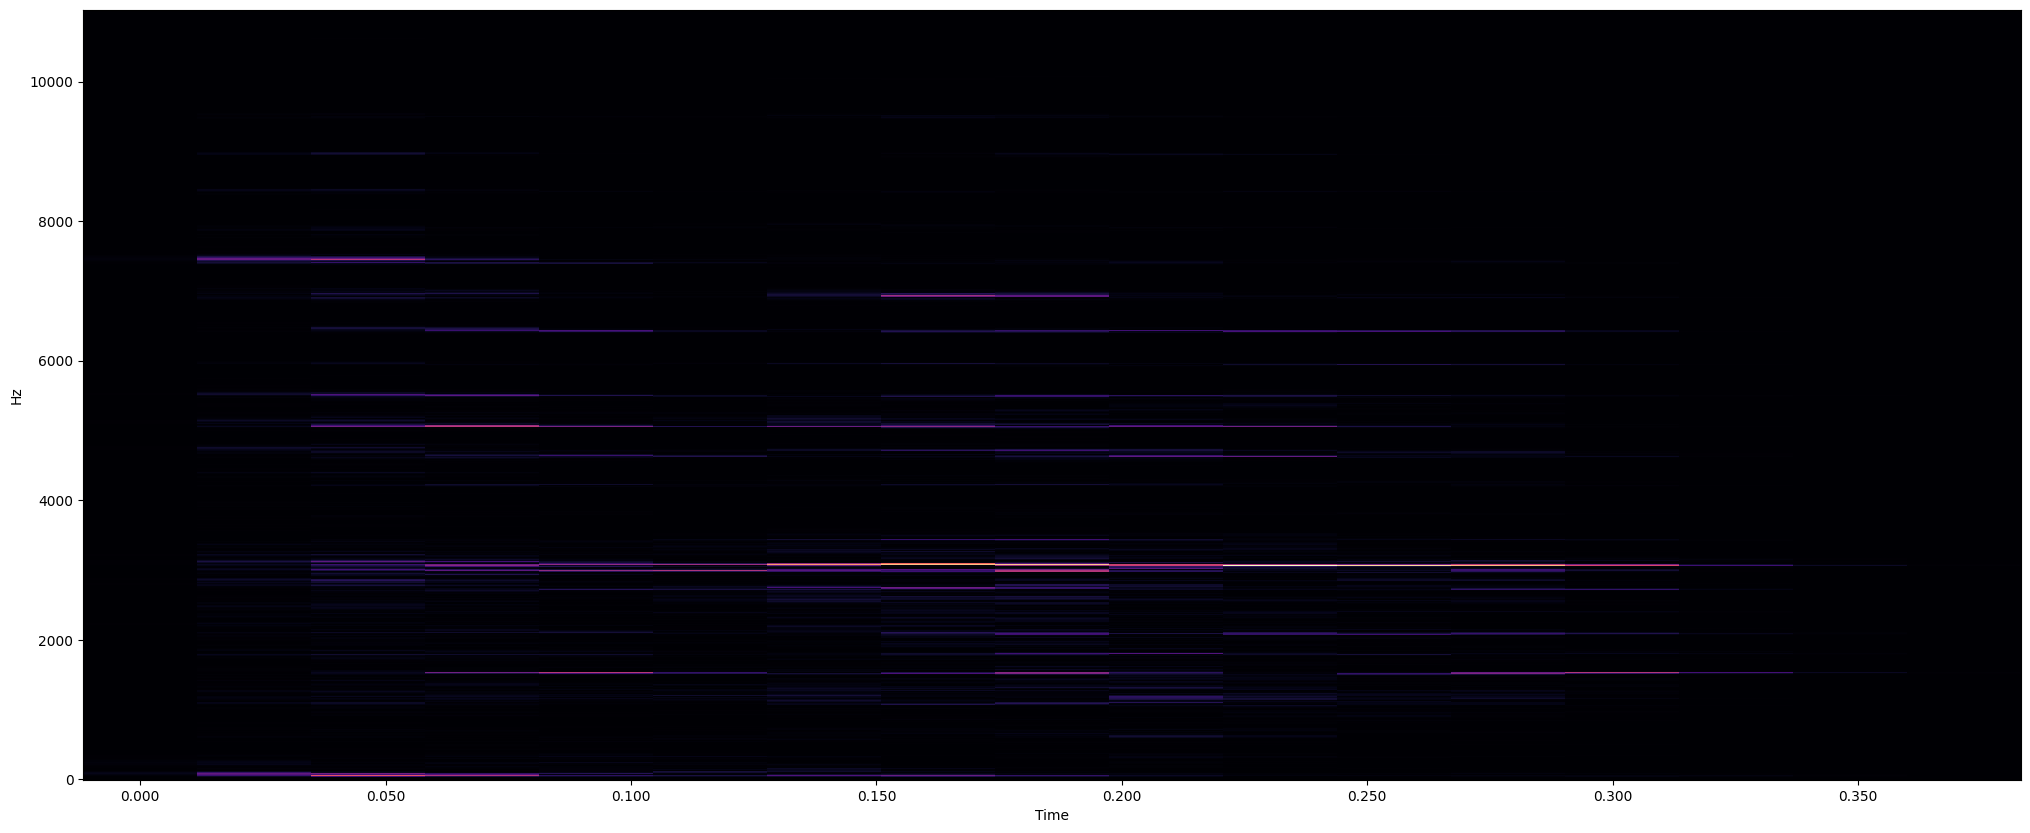

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
plot_spectrogram(Y_thud, sr, HOP_SIZE)

This one looks the most accurate

AttributeError: module 'matplotlib' has no attribute 'axes'

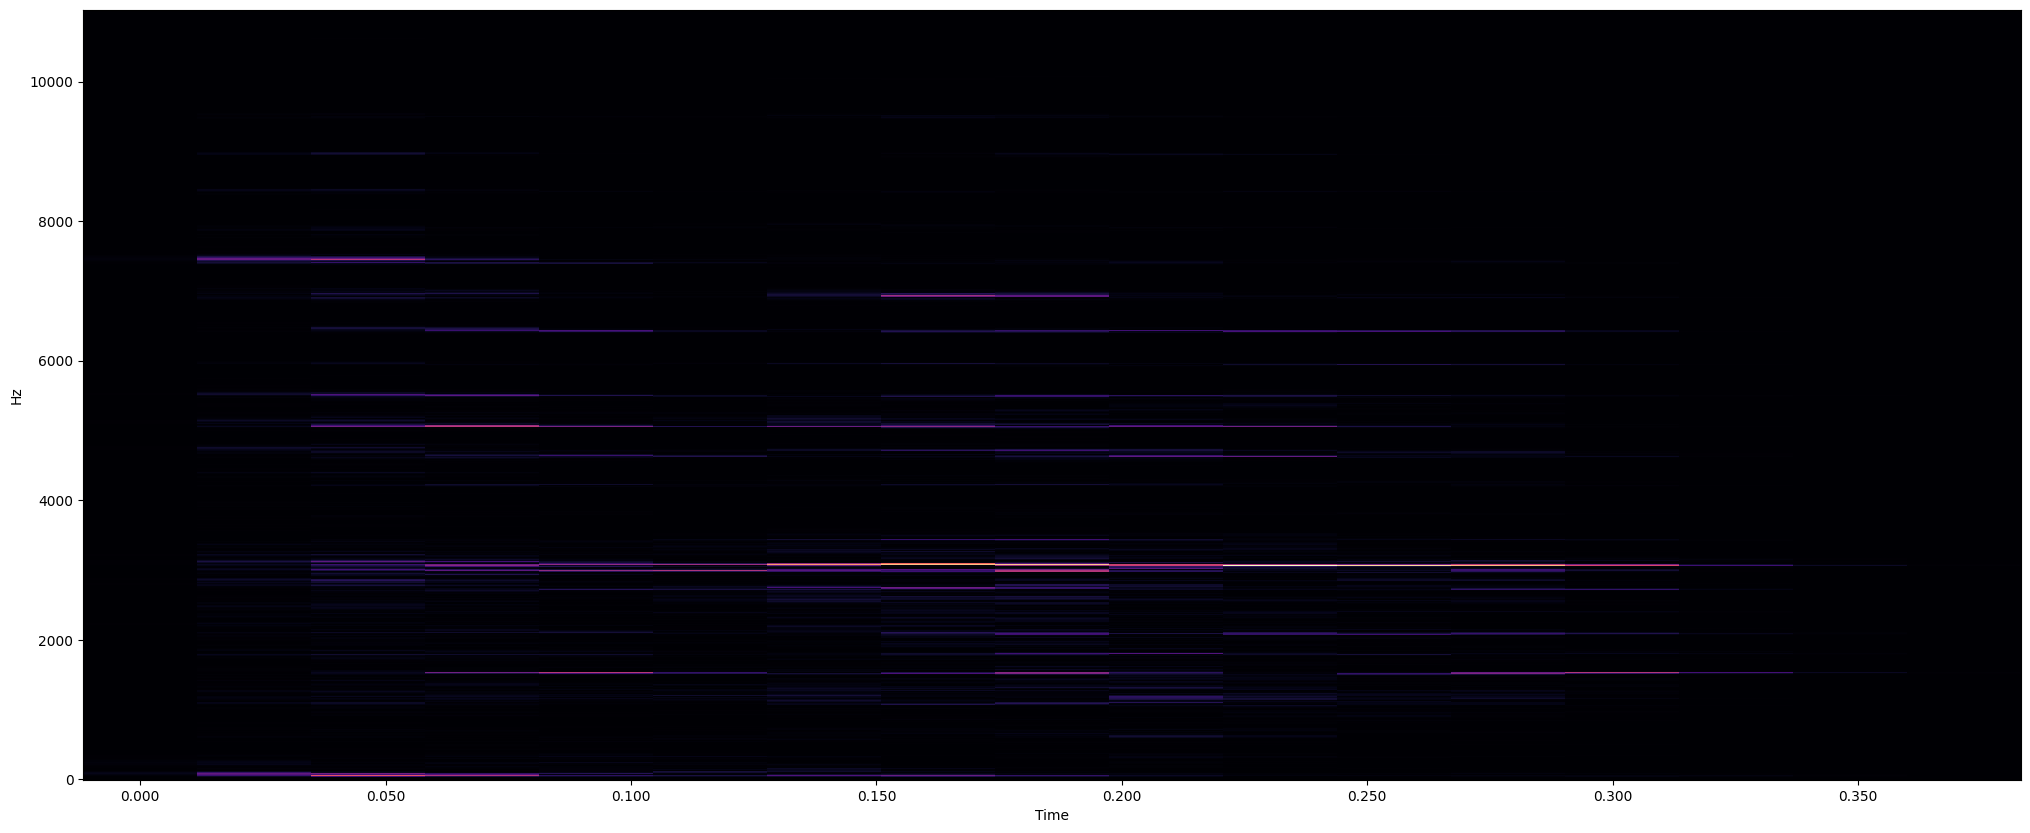

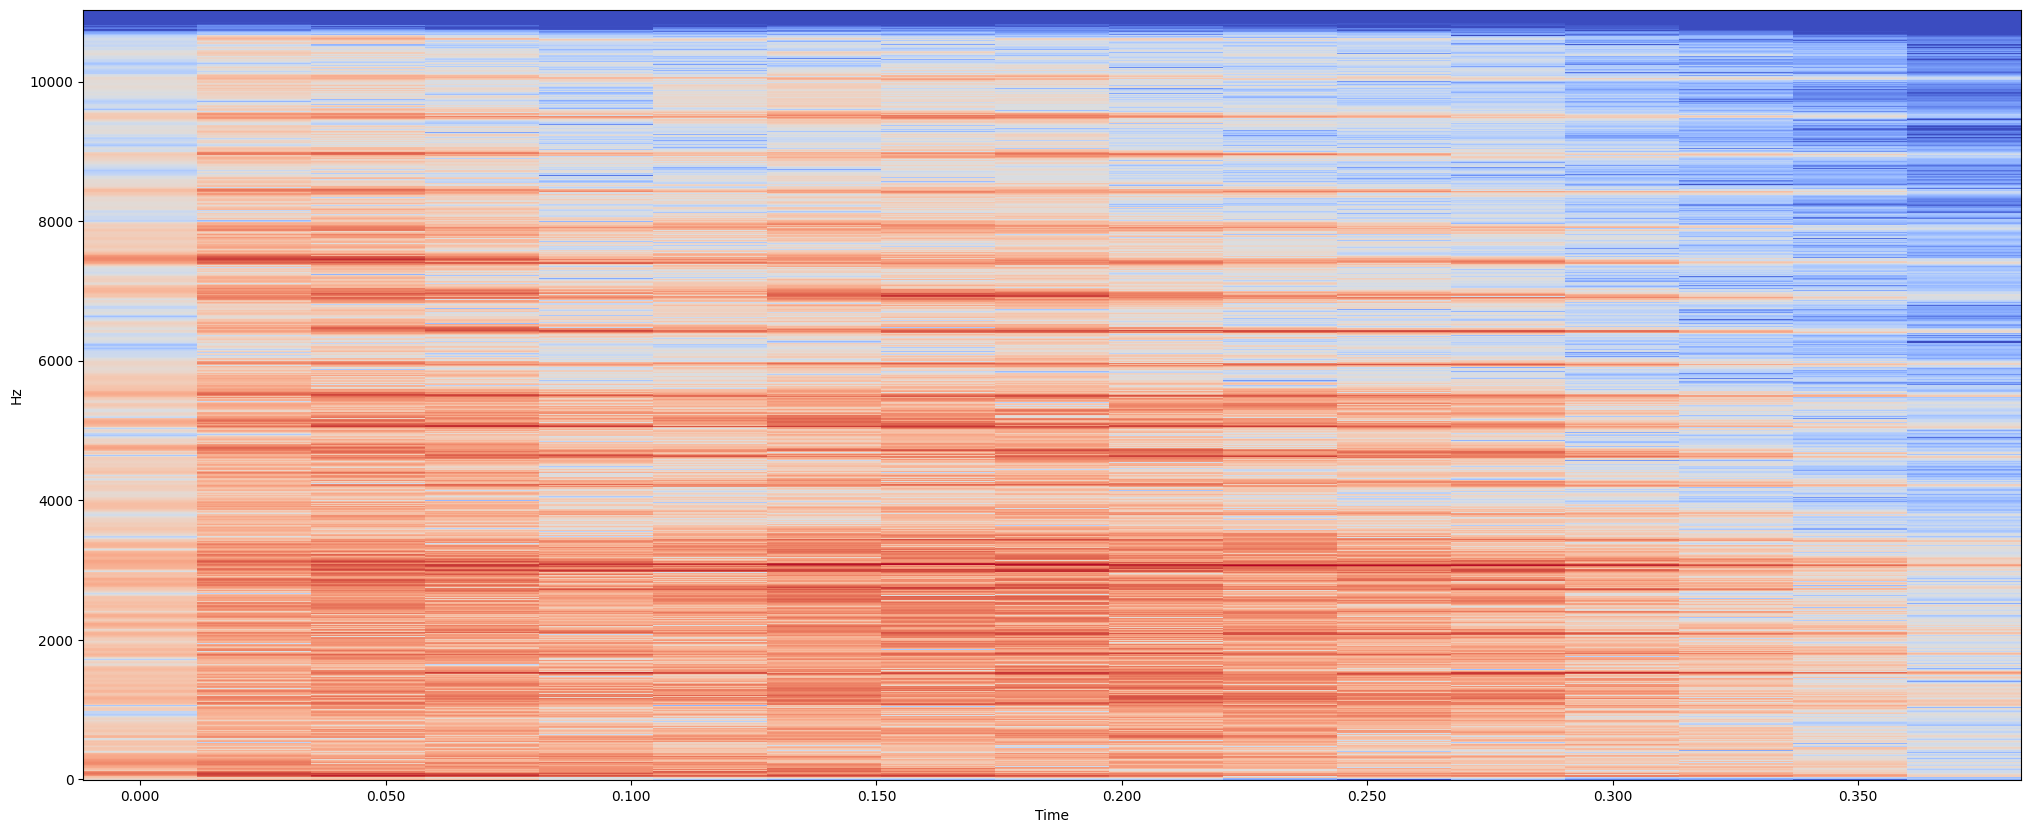

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
Y_log_thud = librosa.power_to_db(Y_thud)
plot_spectrogram(Y_log_thud, sr, HOP_SIZE)

AttributeError: module 'matplotlib' has no attribute 'axes'

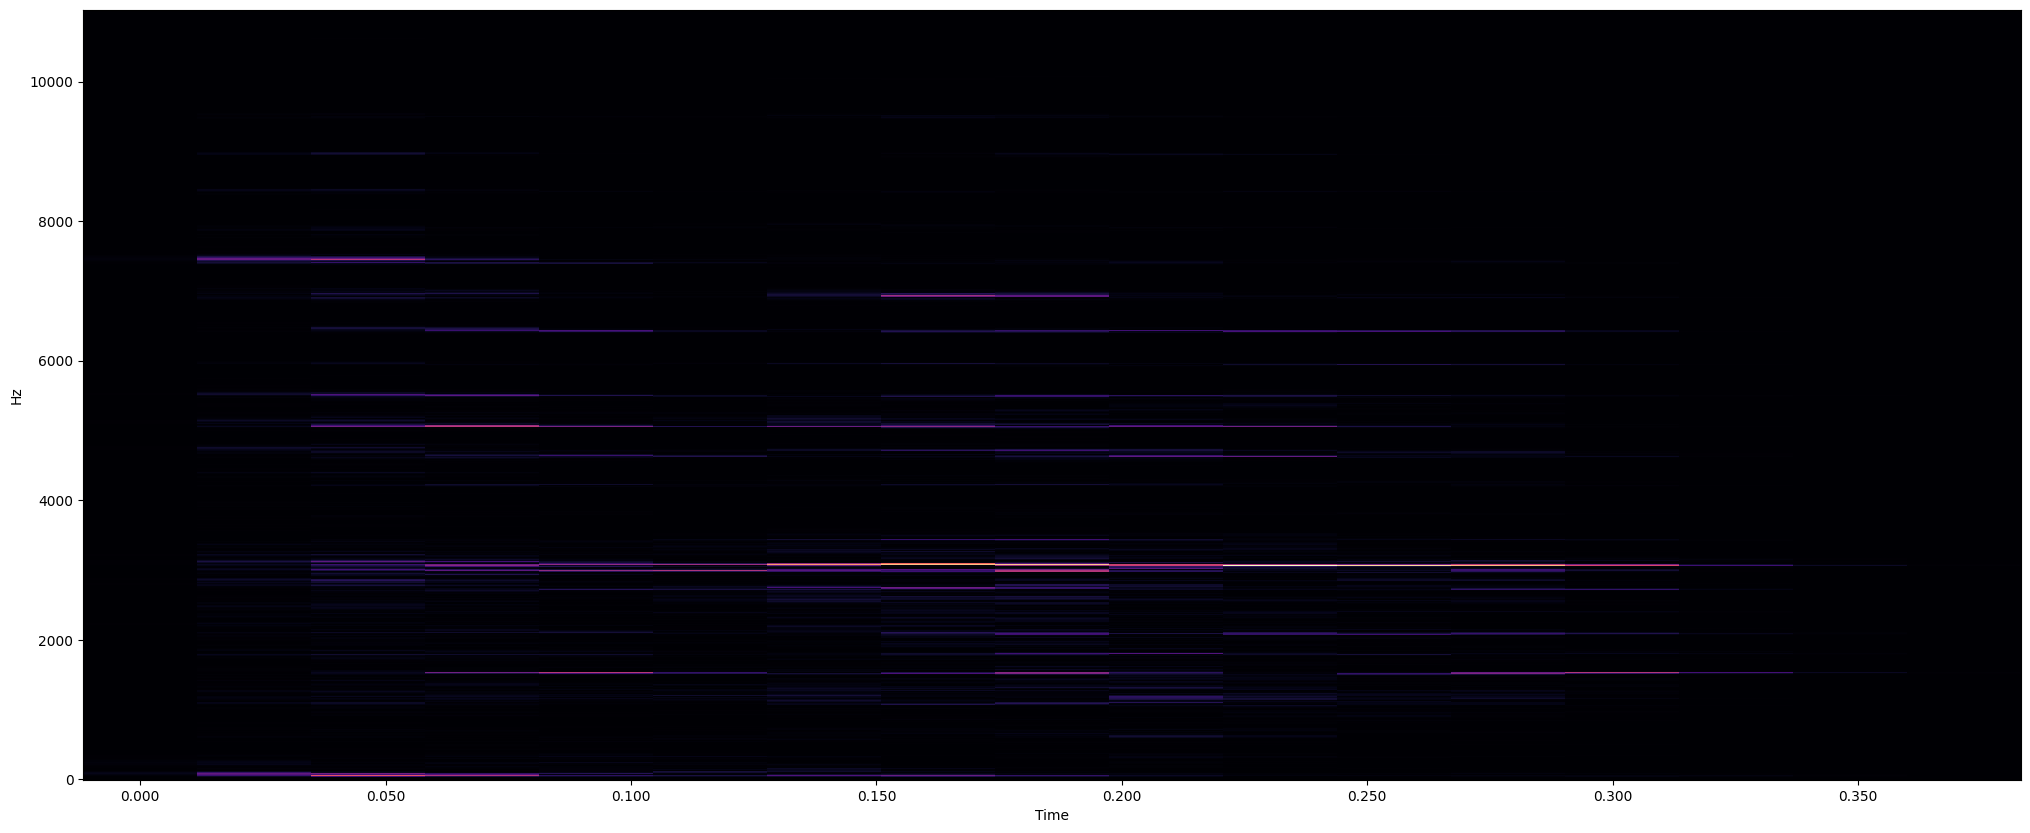

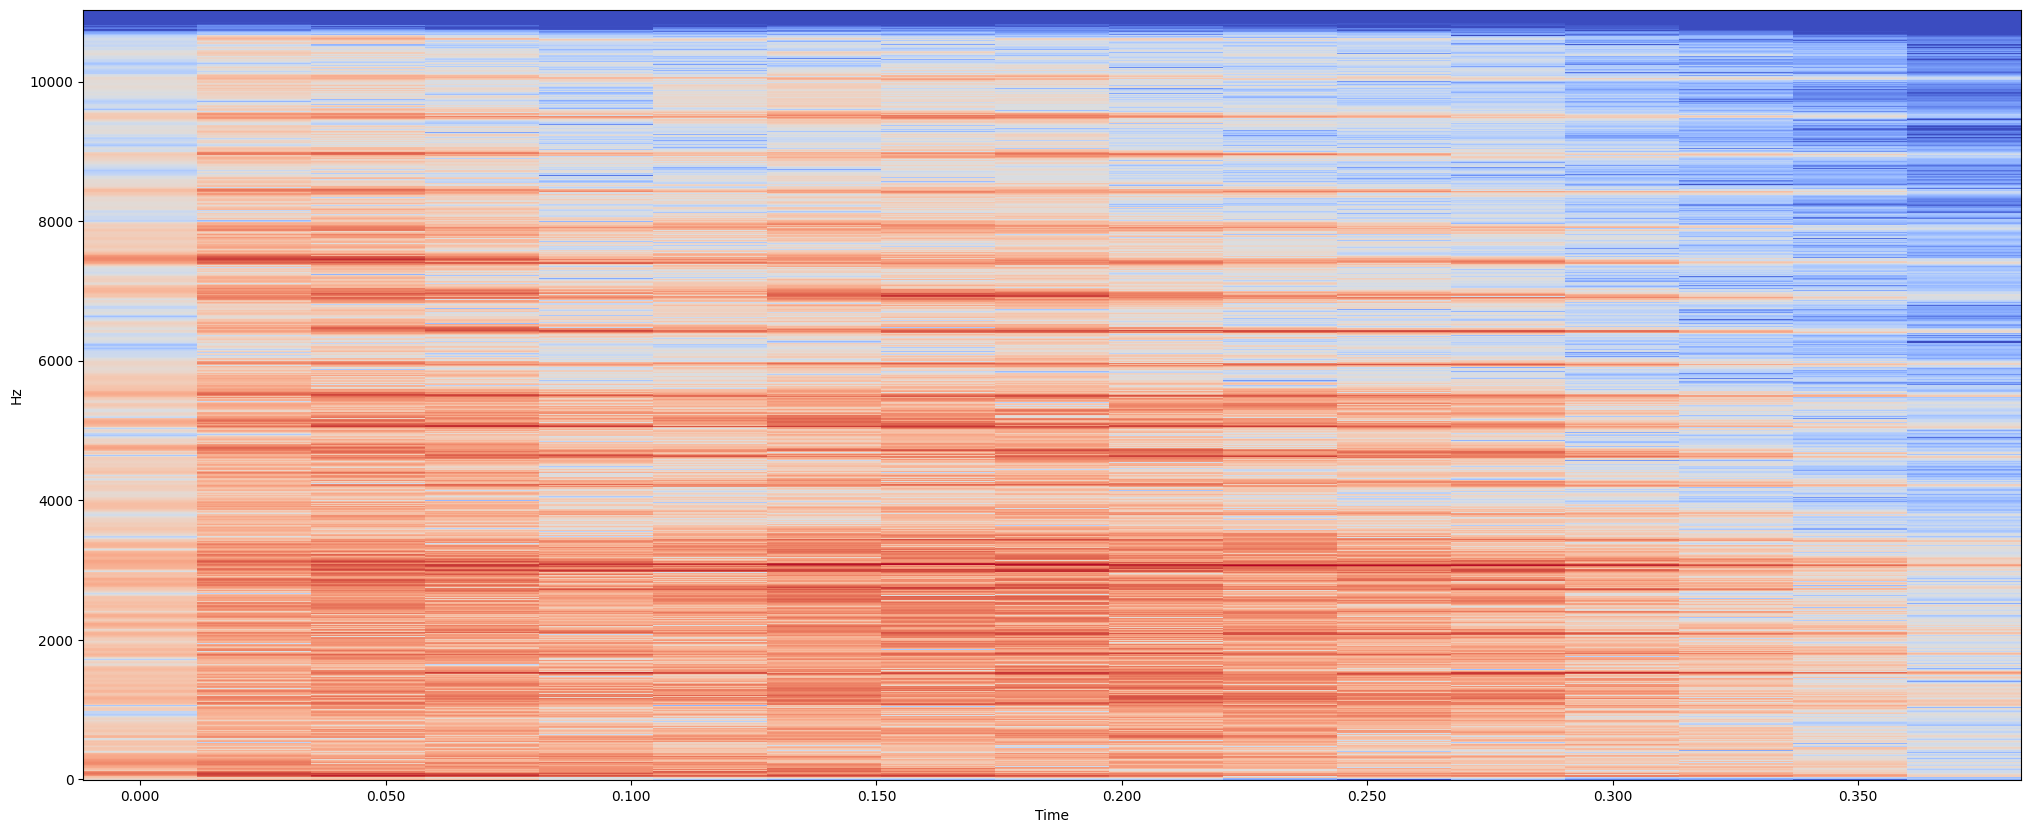

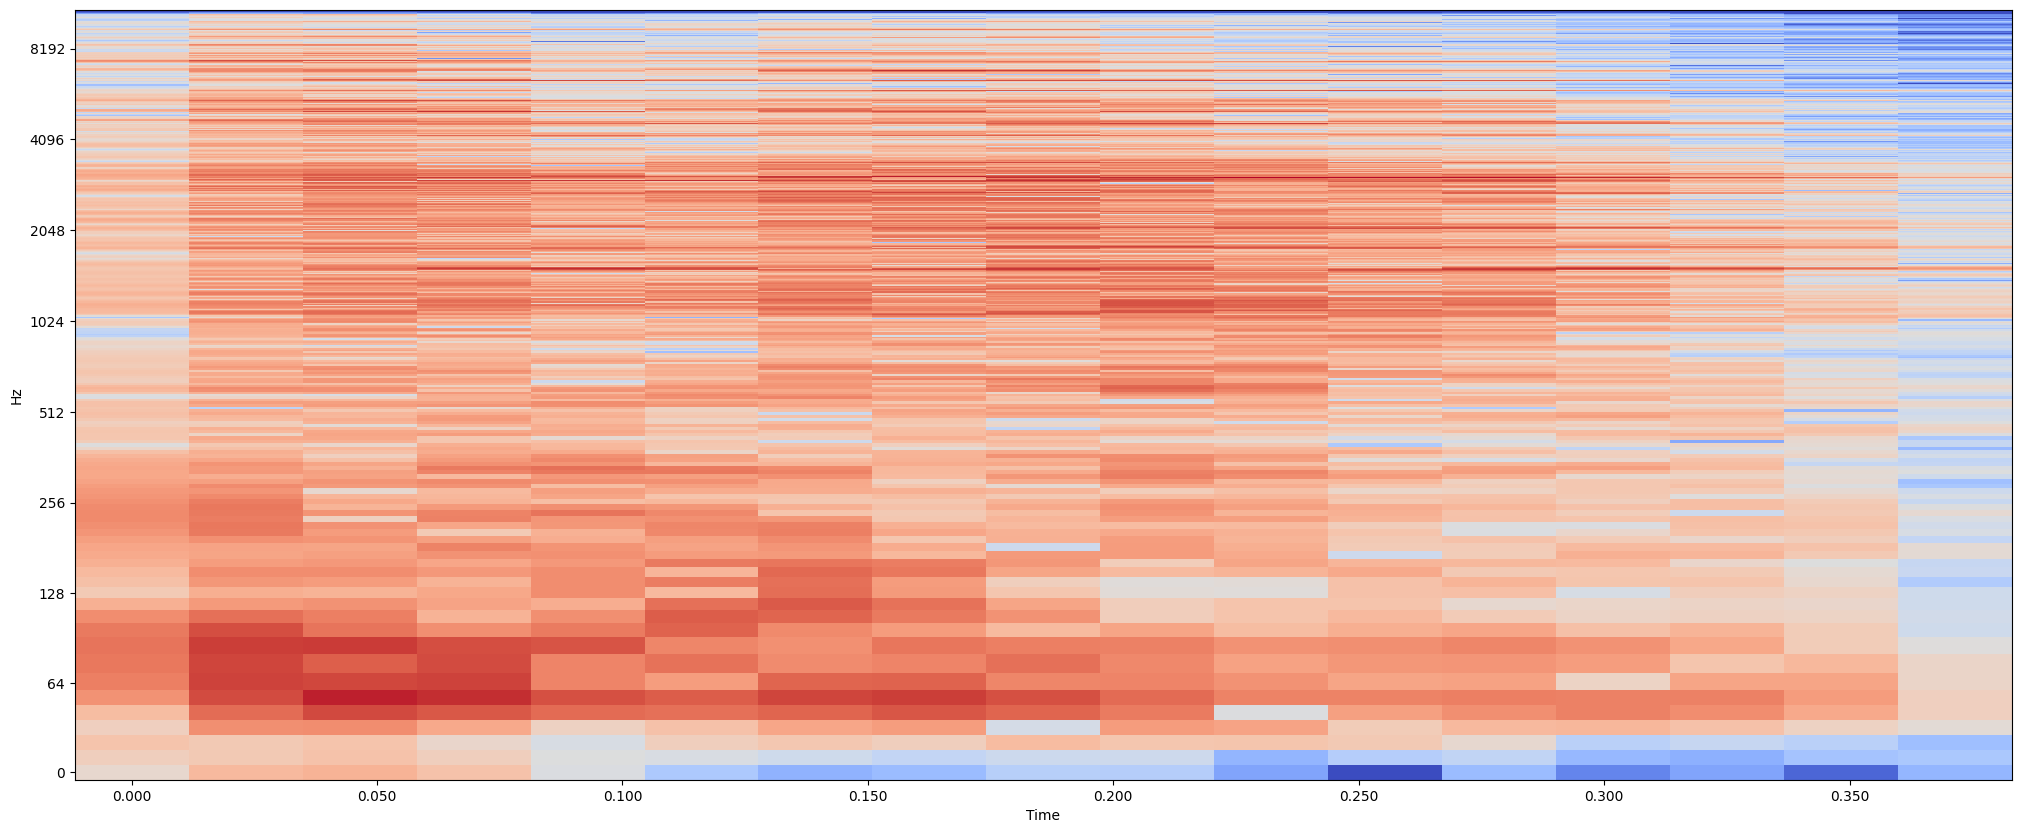

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
plot_spectrogram(Y_log_thud, sr, HOP_SIZE, y_axis="log")